In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.special import kn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


$$\begin{equation}
v_{c}^{2} = R\frac{\partial\Phi}{\partial R} = \frac{4GR_{d}^{2}\Sigma_{d}R}{z_{0}}\int_{-\infty}^{\infty}dz' \left(e^{-|z'|/z_{0}} - \alpha_{1}e^{-|z'|/z_{0}} + \frac{\alpha_{1}z_{0}}{z_{1}}e^{-|z'|/z_{1}}\right) \int_{0}^{\infty} dx \frac{x^{2}K_{0}(x)}{\sqrt{1 - \left( \frac{2R_{d}x}{\sqrt{(z-z')^{2} + (R_{d}x + R)^{2}} + \sqrt{(z-z')^{2} + (R_{d}x - R)^{2}}} \right)^{2}}}\frac{\left( \frac{R_{d}x-R}{\sqrt{(z-z')^2 + (R_{d}x-R)^2}} - \frac{R_{d}x+R}{\sqrt{(z-z')^2 + (R_{d}x+R)^2}} \right)}{\left( \sqrt{(z-z')^{2} + (R_{d}x + R)^{2}} + \sqrt{(z-z')^{2} + (R_{d}x - R)^{2}} \right)^{2}}
\end{equation}$$

In [2]:
#Constants
G = 4.302e-6#kpc/SM(km/s)^2
R_d_I = 2.0#kpc
R_d_II = 3.2#kpc
Sigma_I_SD = (1905.0e6)*0.75
Sigma_II_SD = (536.0e6)*0.75
z_0 = 0.3#kpc
z_1 = 1.#kpc

In [3]:
R = np.linspace(0.1,15.,100)
z_p = np.linspace(-15.,15.,100)

In [4]:
def V_c_d(x,z,R,z_p,z_0=0.3,z_1=1.,alpha_1=1.,R_d=R_d_I):
    E = np.exp(-abs(z)/z_0) - alpha_1*np.exp(-abs(z)/z_0) + (alpha_1*z_0*np.exp(-abs(z)/z_1))/z_1
    n1 = x**2.*kn(0,x)
    d1 = np.sqrt(1. - ((2.*R_d*x)/(np.sqrt((z_p-z)**2. + (R_d*x+R)**2.) + np.sqrt((z_p-z)**2. + (R_d*x-R)**2.)))**2.)
    t1 = n1/d1
    n2 = (R_d*x-R)/(np.sqrt((z_p-z)**2. + (R_d*x-R)**2.)) - (R_d*x+R)/(np.sqrt((z_p-z)**2. + (R_d*x+R)**2.))
    d2 = (np.sqrt((z_p-z)**2. + (R_d*x+R)**2.) + np.sqrt((z_p -z)**2. + (R_d*x-R)**2.))**2.
    t2 = n2/d2
    return 2.*R*E*t1*t2

In [6]:
Integral_d = []
for i in range (0,len(R)):
    integrando = lambda x,z: V_c_d(x,z,R[i],z_p[i])
    result = integrate.dblquad(integrando,-np.inf,np.inf,lambda z: 0, lambda z: np.inf)[0]
    Integral_d.append(result)
print Integral_d

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/Users/atalia/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discont

[-2.309664353072496e-06, -1.53138100478917e-05, -4.1493417890287306e-05, -8.304629708295258e-05, -0.00014247797897297976, -0.0002226653349077286, -0.00032687328149711087, -0.0004588198627240873, -0.0006227484563009615, -0.0008234813056173803, -0.0010664951361629598, -0.0013579908780323316, -0.0017049983048178043, -0.0021154446699236896, -0.0025982575451169105, -0.003163456215982701, -0.0038222447516284733, -0.004587095473129026, -0.0054718196837421716, -0.006491628056321667, -0.007663144551097547, -0.009004397363261392, -0.010534742202600839, nan, -0.014245869273799023, -0.01647032085323823, -0.018970428034198284, -0.02176814236031072, -0.024884285922076102, -0.02833765741026476, -0.032143976008714256, -0.03631467141592573, -0.040855550824477345, -0.04576533544684799, -0.051034174715739976, -0.056642137472642504, -0.06255776854389235, -0.06873678975061838, -0.07512099365321064, nan, nan, -0.09469793990754566, -0.10101860852509693, -0.10702465280579702, -0.11256566884188633, -0.11747582

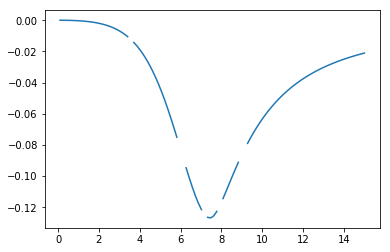

In [7]:
vel = np.array(Integral_d)
plt.plot(R,vel)

In [9]:
def V_c_d_wo_z_p(x,z,R,z_0=0.3,z_1=1.,alpha_1=1.,R_d=R_d_I):
    E = np.exp(-abs(z)/z_0) - alpha_1*np.exp(-abs(z)/z_0) + (alpha_1*z_0*np.exp(-abs(z)/z_1))/z_1
    n1 = x**2.*kn(0,x)
    d1 = np.sqrt(1. - ((2.*R_d*x)/(np.sqrt((-z)**2. + (R_d*x+R)**2.) + np.sqrt((-z)**2. + (R_d*x-R)**2.)))**2.)
    t1 = n1/d1
    n2 = (R_d*x-R)/(np.sqrt((-z)**2. + (R_d*x-R)**2.)) - (R_d*x+R)/(np.sqrt((-z)**2. + (R_d*x+R)**2.))
    d2 = (np.sqrt((-z)**2. + (R_d*x+R)**2.) + np.sqrt((-z)**2. + (R_d*x-R)**2.))**2.
    t2 = n2/d2
    return 2.*R*E*t1*t2

In [10]:
Integral_d_wo_zp = []
for i in range (0,len(R)):
    integrando = lambda x,z: V_c_d_wo_z_p(x,z,R[i])
    res = integrate.dblquad(integrando,-np.inf,np.inf,lambda z: 0, lambda z: np.inf)[0]
    Integral_d_wo_zp.append(res)
print Integral_d_wo_zp

[-0.0005394303065381581, -0.0030883203804834346, -0.0072519800872524005, -0.012608349148006221, -0.018822748688995215, -0.025626817575964092, -0.03280435231732009, -0.04018103172253255, -0.047616616524064466, -0.054998849127931966, -0.062238582241629384, -0.06926582896072352, -0.07602652304145857, -0.08247983843175824, -0.08859595648055738, -0.09435419645866608, -0.09974144412445723, -0.10475082695429626, -0.1093805949565793, -0.11363317399332297, -0.1175143644221507, -0.12103266276010323, -0.12419868778726924, -0.12702469556218324, -0.1295241703077571, -0.1317114801325, -0.1336015882025685, -0.13520981140918772, -0.1365516197206536, -0.1376424705011346, -0.13849767185892797, -0.1391322735455705, -0.13956097697125697, -0.13979806585762622, -0.13985735196329743, -0.1397521343184885, -0.13949517010839355, -0.13909865488877957, -0.13857421154657043, -0.13793288342499954, -0.13718513938292112, -0.13634087517487883, -0.13540942471332598, -0.1343995721625869, -0.13331956666458775, -0.1321771

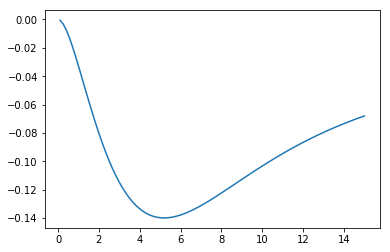

In [11]:
vel_wo_zp = np.array(Integral_d_wo_zp)
plt.plot(R,vel_wo_zp)